In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
navoneel_brain_mri_images_for_brain_tumor_detection_path = kagglehub.dataset_download('bhaveshmittal/melanoma-cancer-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'melanoma-cancer-dataset' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/melanoma-cancer-dataset/train/Malignant/1089.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/3981.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/5200.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/1136.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/4057.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/5519.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/591.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/3941.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/2091.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/4404.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/3751.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/3394.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/3179.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/2890.jpg
/kaggle/input/melanoma-cancer-dataset/train/Malignant/1171.jpg
/kagg

#dataset loading

In [ ]:
import os
import pandas as pd
import numpy as np


from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
OD = OrdinalEncoder(categories= [['Benign', 'Malignant']])
LABEL = ['Benign', 'Malignant']

In [ ]:
df_d = '/kaggle/input/melanoma-cancer-dataset'

In [ ]:
train_path = []
train_label = []
for split in os.listdir(df_d):
  for label in os.listdir(df_d+'/'+split):
    for path in os.listdir(df_d+'/'+split+'/'+label):
      train_path.append(df_d+'/'+split+'/'+label+'/'+path)
      train_label.append(label)



df = pd.DataFrame(train_path, columns=['path'])
df['label'] = train_label

df = shuffle(df)
# this code shuffles de Entities keeping labels stratified

df


,path,label
8286,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
6917,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
13667,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
6156,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
13651,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
...,...,...
6353,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
11856,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
521,/kaggle/input/melanoma-cancer-dataset/test/Ben...,Benign
4272,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign


(array([7289.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6590.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

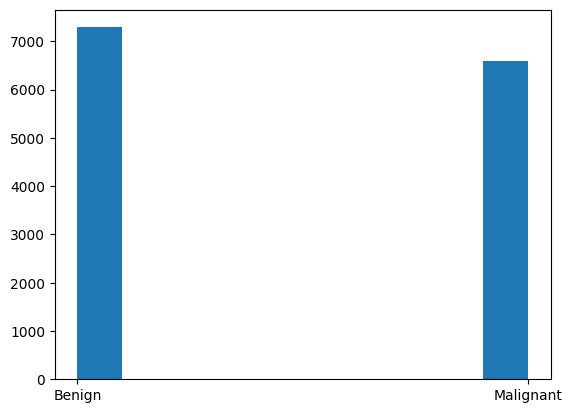

In [ ]:
plt.hist(df['label'])

In [ ]:
df['label'].value_counts()

,count
label,
Benign,7289
Malignant,6590


In [ ]:
sub_df = df[df['label'] == 'Malignant']

In [ ]:
sub_df

,path,label
13667,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
13651,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
13113,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
11832,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
9242,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
...,...,...
11043,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
1005,/kaggle/input/melanoma-cancer-dataset/test/Mal...,Malignant
13661,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
10340,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant


In [ ]:
sub_df = sub_df.sample(2000)

In [ ]:
sub_df

,path,label
12802,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
9415,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
12298,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
10942,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
1946,/kaggle/input/melanoma-cancer-dataset/test/Mal...,Malignant
...,...,...
1571,/kaggle/input/melanoma-cancer-dataset/test/Mal...,Malignant
8310,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
13708,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
10088,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant


In [ ]:
dub_df2 = df[df['label'] == 'Benign']

In [ ]:
df = pd.concat([dub_df2, sub_df])

(array([7289.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

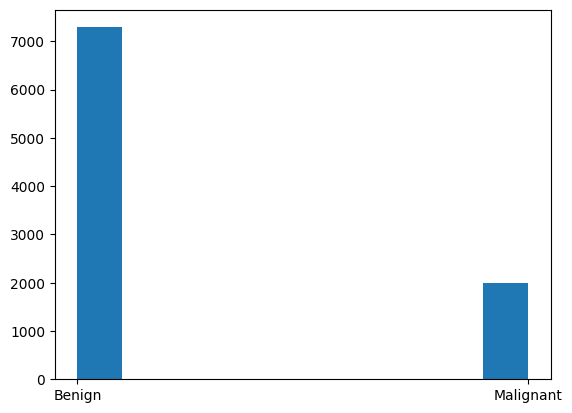

In [ ]:
plt.hist(df['label'])

In [ ]:
df['label'].value_counts()

,count
label,
Benign,7289
Malignant,2000


In [ ]:
#save the data
df.to_csv('melanoma-cancer-dataset.csv', index=False)


In [ ]:
#lets resplit x_train, y_train
x = df['path']
y = df['label']

In [ ]:
# splitting train into Train 80% and Test 20% sets
x_train, x_temp, y_train, y_temp= train_test_split(x, y, random_state= 42, stratify=y, test_size= 0.2)
x_val, x_test, y_val, y_test= train_test_split(x, y, random_state= 42, stratify=y, test_size= 0.5)

In [ ]:
print('num of training set ', len(x_train))
print('num of validation set ', len(x_val))
print('num of testing set ', len(x_test))

num of training set  7431
num of validation set  4644
num of testing set  4645


In [ ]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

x_val = x_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
#save the data
x_train.to_csv('melanoma-cancer-dataset_x_train.csv', index=False)
y_train.to_csv('melanoma-cancer-dataset_y_train.csv', index=False)



x_val.to_csv('melanoma-cancer-dataset_x_val.csv', index=False)
y_val.to_csv('melanoma-cancer-dataset_y_val.csv', index=False)


x_test.to_csv('melanoma-cancer-dataset_x_test.csv', index=False)
y_test.to_csv('melanoma-cancer-dataset_y_test.csv', index=False)



In [ ]:
print(y_train.value_counts())
needed = 3418 - 1266
print('___________')
print(needed)

label
Benign       5831
Malignant    1600
Name: count, dtype: int64
___________
2152


In [ ]:
def images_show(index_list, x, y):
    images = []
    for i, idx in enumerate(index_list):
        image = load_img(x[idx], target_size=(150,150))
        images.append(image)

    plt.figure(figsize=(60, 45))
    for j, imidx in enumerate(images):
        plt.subplot(5, 5, j+1)
        plt.imshow(imidx)
        plt.title(f"{index_list[j]} :{y[index_list[j]]}", fontsize=60)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

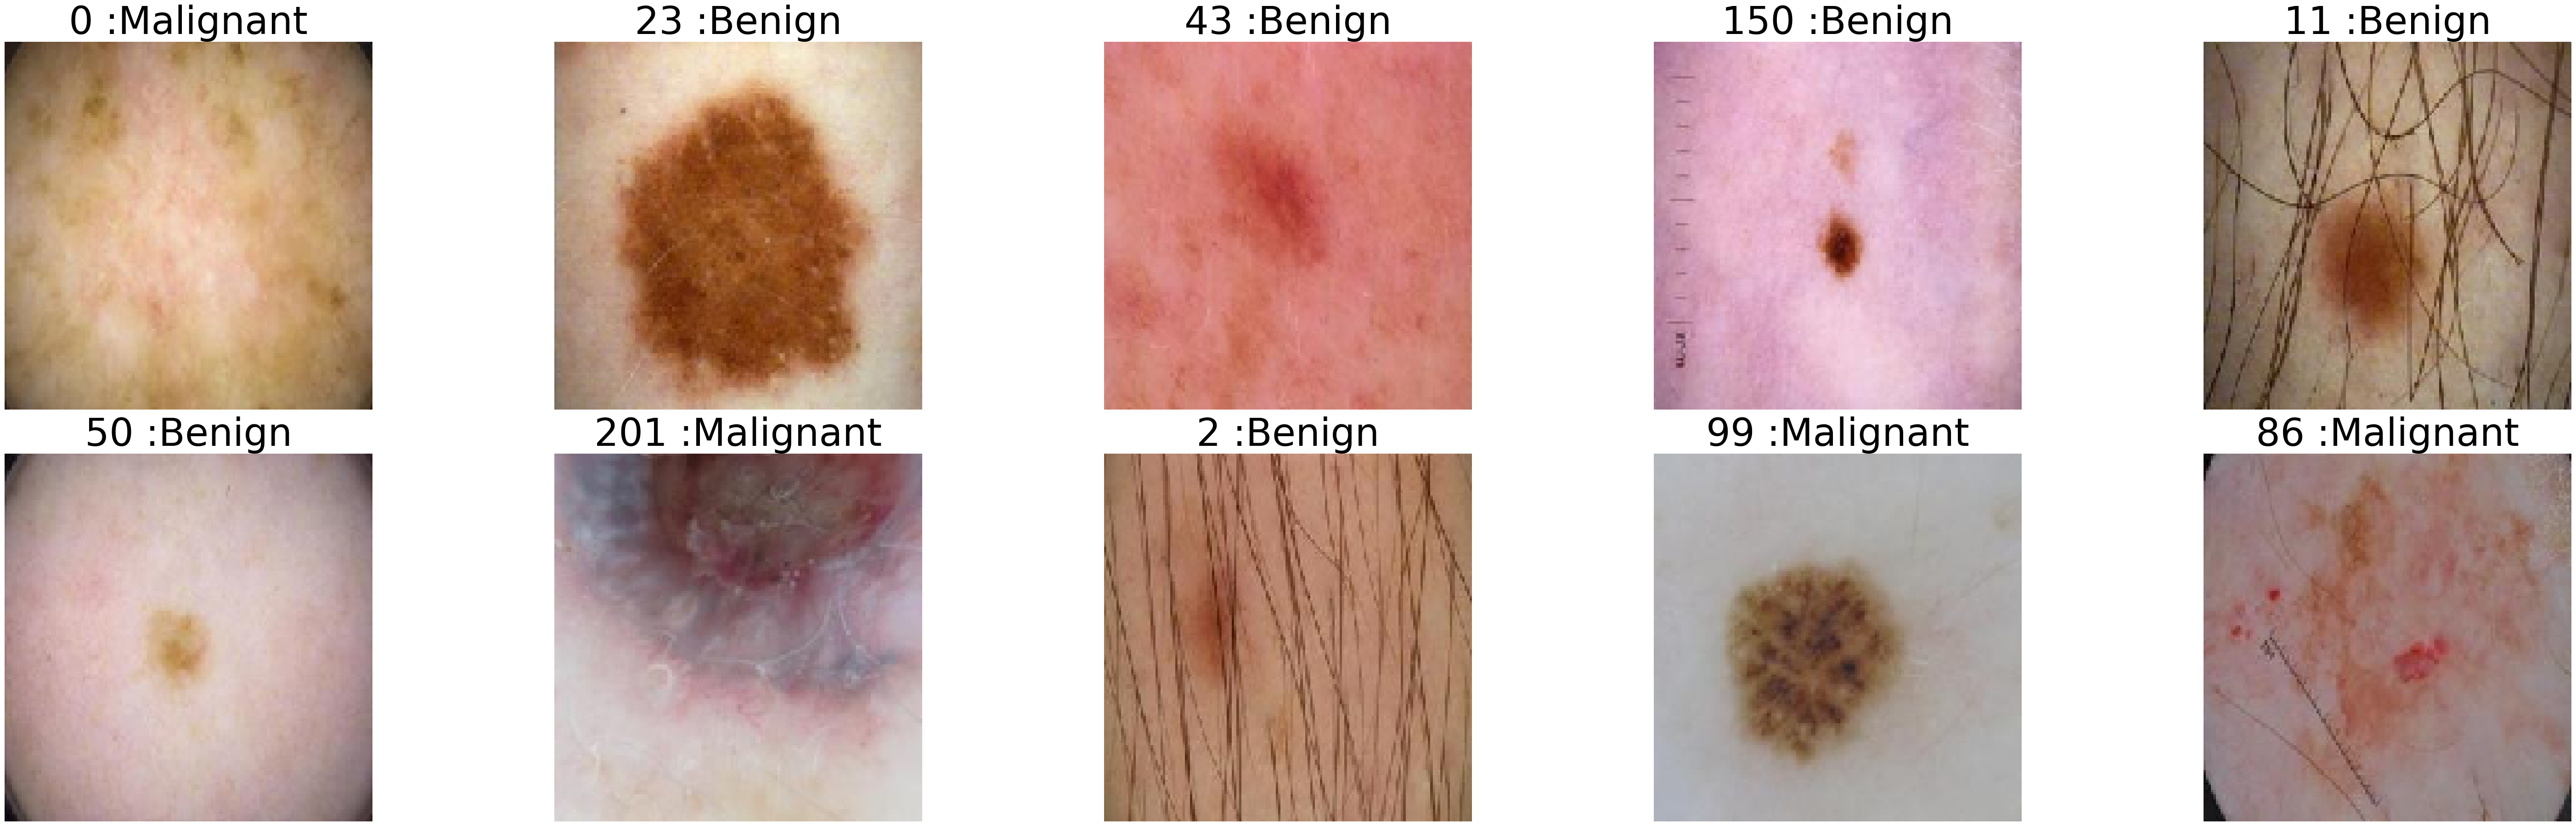

In [ ]:
# showing a sample from x_train ,any number between 0 - 201
images_show(index_list=[0, 23, 43, 150,
            11, 50,  201, 2, 99, 86], x=x_train, y=y_train)

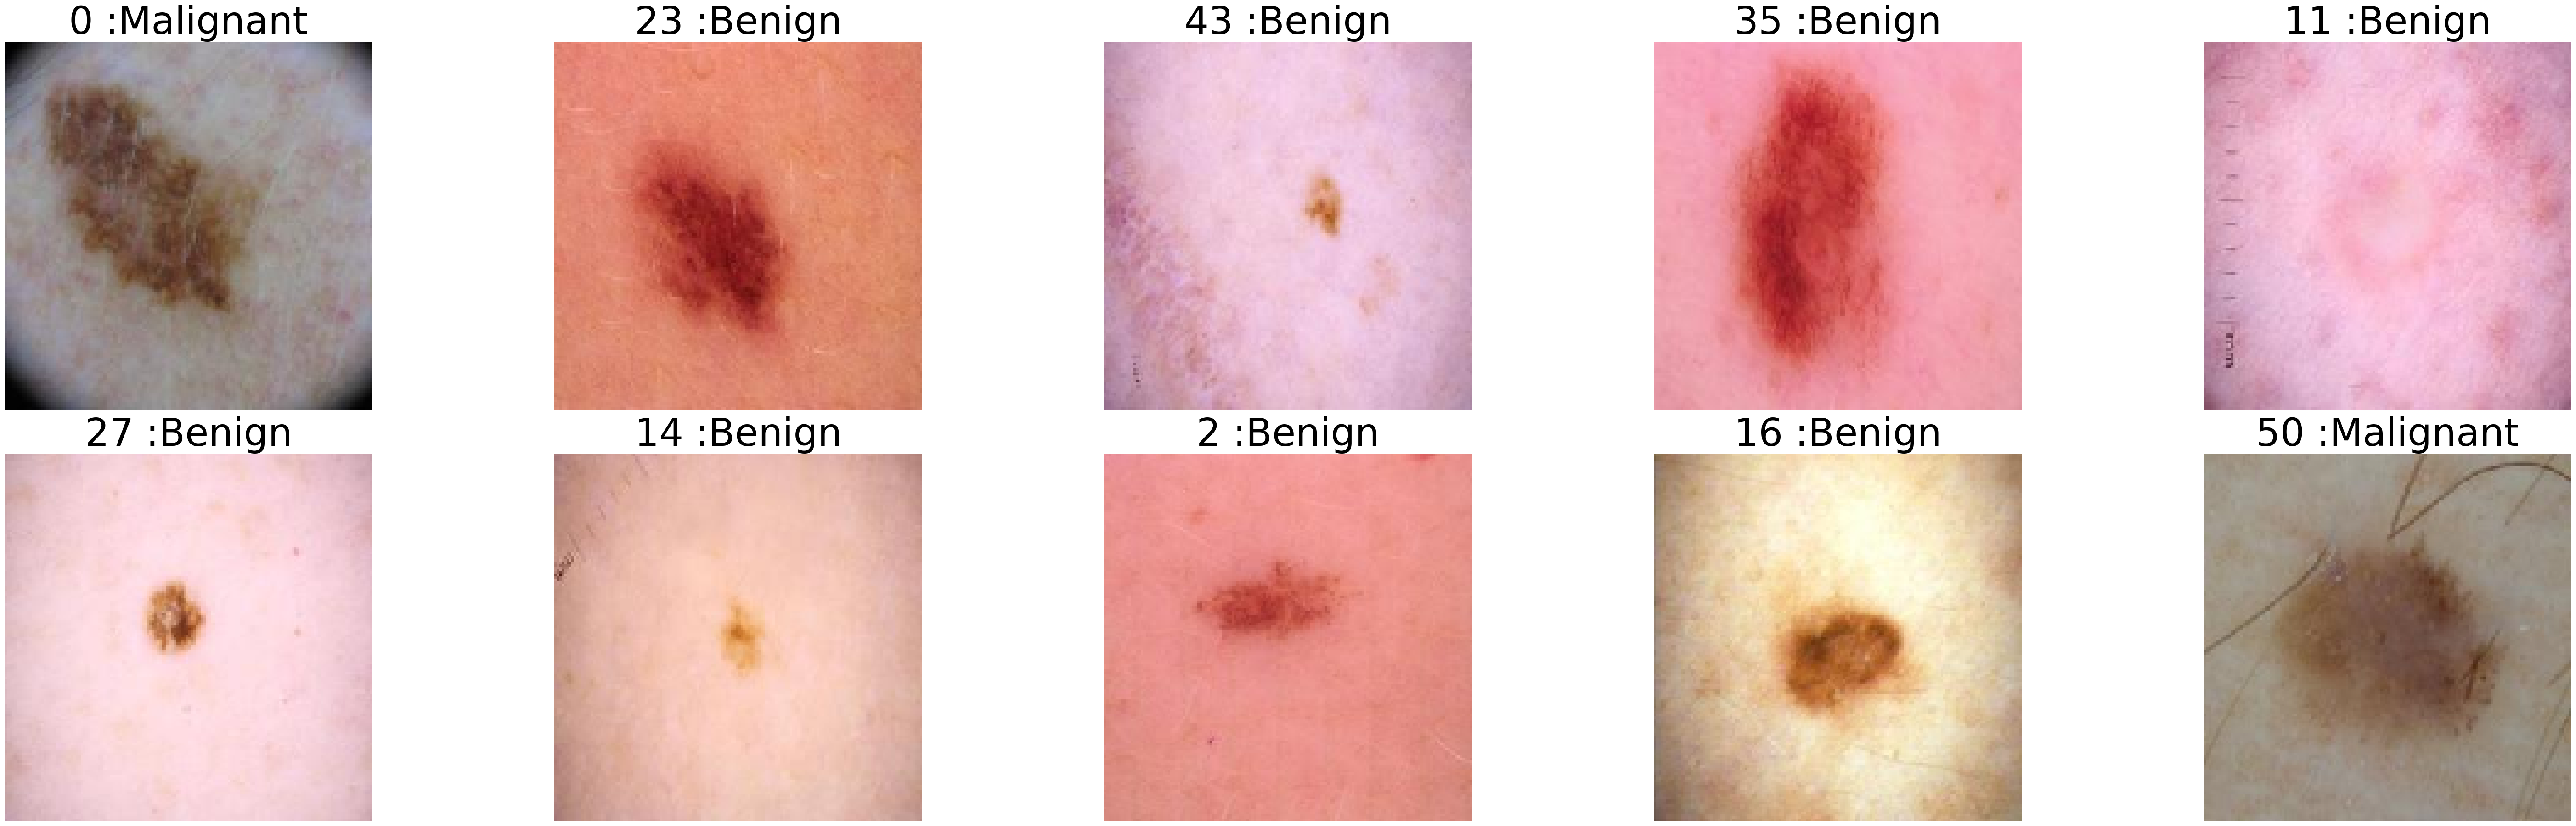

In [ ]:
# showing a sample from x_test ,any number between 0 - 50
images_show(index_list=[0, 23, 43, 35,
            11, 27,  14, 2, 16, 50], x=x_test, y=y_test)

In [ ]:
def Array_con(x):
    a = []
    for i in (x):
        image = load_img(i, target_size=(64,64))
        image = np.array(image)
        #r, g, b = cv2.split(image)
        a.append(image)
    return np.array(a)

In [ ]:
x_train = Array_con(x_train)
x_val = Array_con(x_val)
x_test = Array_con(x_test)

In [ ]:
x_train.shape

(7431, 64, 64, 3)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# applying "OD"

y_train = np.array(y_train).reshape(-1,1)
y_val = np.array(y_val).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)


y_train = OD.fit_transform(y_train)
y_val = OD.transform(y_val)
y_test = OD.transform(y_test)

# Imbalance training

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam , SGD, AdamW, Adadelta
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

from tensorflow.keras.callbacks import EarlyStopping


from tensorflow.keras.regularizers import l2

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
372/372 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - binary_accuracy: 0.7769 - loss: 0.5192 - val_binary_accuracy: 0.7847 - val_loss: 0.4401
Epoch 2/60
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7968 - loss: 0.4155 - val_binary_accuracy: 0.7858 - val_loss: 0.3978
Epoch 3/60
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.7867 - loss: 0.3942 - val_binary_accuracy: 0.7970 - val_loss: 0.3755
Epoch 4/60
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7986 - loss: 0.3766 - val_binary_accuracy: 0.8185 - val_loss: 0.3590
Epoch 5/60
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8111 - loss: 0.3717 - val_binary_accuracy: 0.8226 - val_loss: 0.3520
Epoch 6/60
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8305 - loss: 0.3426 - val_binary_accuracy: 0.8295 - val_loss: 0.3423
Epoch 7/60
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8401 - loss: 0.3378 - val_binary_accuracy: 0.8403 - val_loss: 0.3361
Epoch

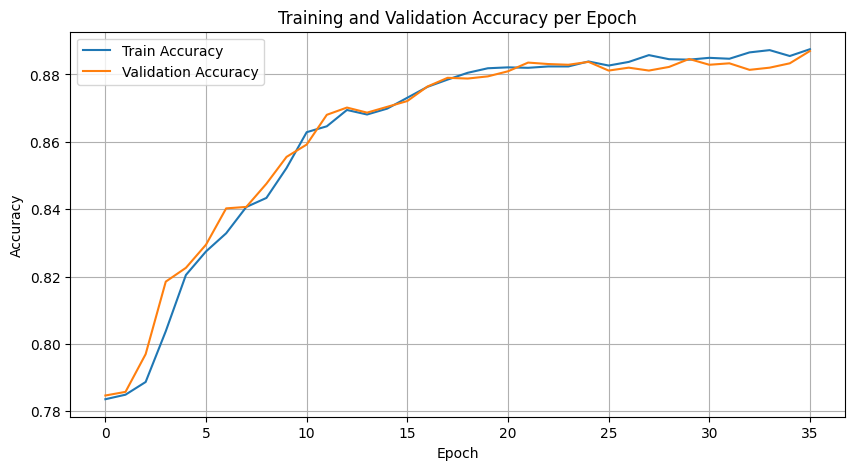

146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      3645
         1.0       0.82      0.58      0.68      1000

    accuracy                           0.88      4645
   macro avg       0.86      0.77      0.81      4645
weighted avg       0.88      0.88      0.88      4645


Confusion Matrix:


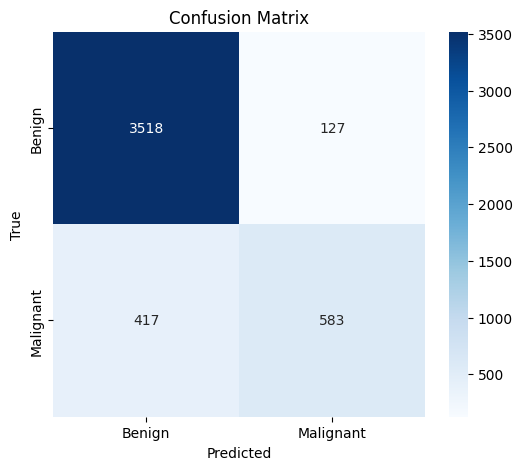

In [ ]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), strides=(1,1) ,activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPool2D(),
    layers.Conv2D(4, (3, 3), strides=(1,1) , activation='relu'),

    layers.Conv2D(4, (3, 3), strides=(1,1) , activation='relu'),
    layers.AveragePooling2D((1,1)),

    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer= Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


test_loss, test_accuracy = model.evaluate(x_test, y_test)
final_train_acc = history.history['binary_accuracy'][-1]

print(f"\nFinal Train Accuracy: {final_train_acc:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



plt.figure(figsize=(10, 5))
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()




# Predict on test data
y_prob = model.predict(x_test).ravel()      # probabilities in [0,1]
y_pred = (y_prob >= 0.5).astype(int)        # class 0/1


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix plot
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LABEL, yticklabels=LABEL)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()